In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
from inspyhep import InspireRecord, Author

import matplotlib.pyplot as plt
import numpy as np

## Let's start by looking at individual records

In [3]:
SM_paper = InspireRecord('Weinberg:1967tq')

In [4]:
print(SM_paper)

print("citation_count:", SM_paper.citation_count)
print("authorlist_bibtex_style:", SM_paper.authorlist_bibtex_style)
print("date:", SM_paper.date)
print("arxiv_number:", SM_paper.arxiv_number)
print("published:", SM_paper.published)
print("pub_title:", SM_paper.pub_title)
print("title:", SM_paper.title)
print(SM_paper.get_bibtex())

Steven Weinberg, Phys.Rev.Lett. 19 (1967).
citation_count: 14999
authorlist_bibtex_style: Weinberg, Steven
date: 1967-11-01
arxiv_number: None
published: True
pub_title: Phys.Rev.Lett.
title: A Model of Leptons
@article{Weinberg:1967tq,
    author = "Weinberg, Steven",
    title = "{A Model of Leptons}",
    doi = "10.1103/PhysRevLett.19.1264",
    journal = "Phys. Rev. Lett.",
    volume = "19",
    pages = "1264--1266",
    year = "1967"
}



In [5]:
# this is a metadata author class
SM_paper.authors

{'Steven.Weinberg.1': author(full_name_unicode_normalized='weinberg, steven', affiliations_identifiers=[{'schema': 'ROR', 'value': 'https://ror.org/042nb2s44'}], inspire_roles=[], last_name='Weinberg', signature_block='WANBARGs', uuid='5863d7d5-7db1-4d1c-af0c-6408b3584b3e', id='00135339', ids=[{'schema': 'INSPIRE ID', 'value': 'INSPIRE-00135339'}, {'schema': 'INSPIRE BAI', 'value': 'Steven.Weinberg.1'}], record={'ref': 'https://inspirehep.net/api/authors/983868'}, recid=983868, curated_relation=True, bai='Steven.Weinberg.1', raw_affiliations=[], source='', first_name='Steven', affiliations=[{'record': {'ref': 'https://inspirehep.net/api/institutions/903016'}, 'value': 'MIT, LNS'}], full_name='Weinberg, Steven', death_date='', birth_date='', last_update=datetime.date(1967, 11, 1), affiliation='MIT, LNS', primary_email_address='', advisors=[], positions=[], project_membership=[], schema='', arxiv_categories=[], control_number=0, deleted=False, legacy_creation_date='', legacy_version='', 

## Comprehensive author information

In [6]:
authors = []
authors.append(Author('Steven.Weinberg.1'))
authors.append(Author('S.L.Glashow.1'))
authors.append(Author('G.tHooft.1'))
authors.append(Author('Edward.Witten.1'))

/Users/mhostert/Repos/inspy-hep/src/inspyhep/author_tools.py:136: UserWarning: Skipping record.
  warnings.warn("Skipping record.")


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_57500/1287208338.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(YEAR_START, YEAR_END + 1), author.get_publications_per_year(year_range=(YEAR_START,YEAR_END), min_citations=0, cumulative=cumsum, only_citeable=True), label=author.bai, color=color, marker='x', s=50, alpha=1, edgecolor='black', linewidth=1, zorder=10)


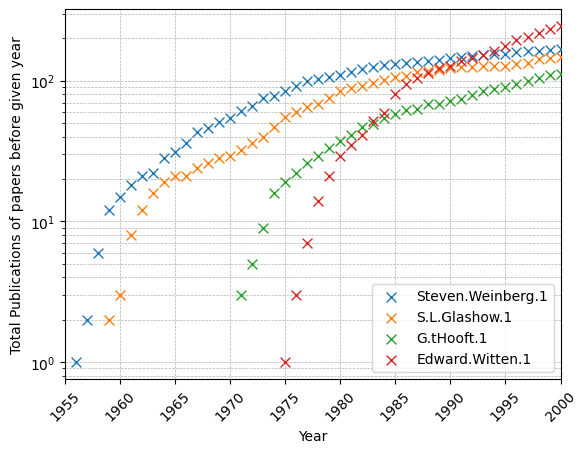

In [86]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cumsum = True
YEAR_START = 1955
YEAR_END = 2000
for author, color in zip(authors, colors):

    description = f"{author.bai}\ncitations: {author.citations}\ncitations (no self): {author.citations_noself},\ncoauthors: {np.size(list(author.coauthors_cap10.keys()))}\n"
    description+= f"num_hits: {author.num_hits}\ncitation/paper avg: {author.citations/author.num_hits if author.num_hits > 0 else 0.0:.1f}\n"
    plt.scatter(np.arange(YEAR_START, YEAR_END + 1), author.get_publications_per_year(year_range=(YEAR_START,YEAR_END), min_citations=0, cumulative=cumsum, only_citeable=True), label=author.bai, color=color, marker='x', s=50, alpha=1, edgecolor='black', linewidth=1, zorder=10)
    # plt.scatter(np.arange(YEAR_START, 2026), author.get_publications_per_year(year_range=(YEAR_START,2025), min_citations=500, cumulative=cumsum, only_citeable=True), color=color, marker='o', s=20, alpha=1, edgecolor='black', linewidth=1, zorder=10)

plt.semilogy()
plt.xlabel("Year")
plt.ylabel("Total Publications of papers before given year")
plt.xlim(YEAR_START, YEAR_END)
plt.xticks(np.arange(YEAR_START, YEAR_END+1, 5), rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', ncol=1)
plt.savefig('cumulative_papers_example.png', dpi=300, bbox_inches='tight')

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_57500/2058754198.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(YEAR_START, YEAR_END+1), author.get_citations_per_year(year_range=(YEAR_START,YEAR_END), min_citations=0, cumulative=cumsum, only_citeable=True), label=author.bai, color=color, marker='x', s=50, alpha=1, edgecolor='black', linewidth=1, zorder=10)


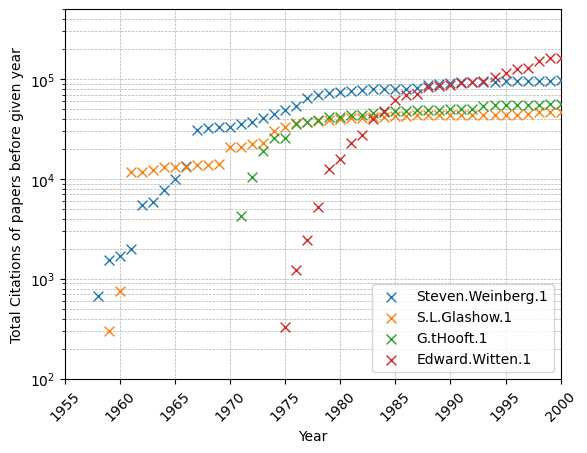

In [87]:
cumsum = True
YEAR_START= 1955
YEAR_END = 2000

for author, color in zip(authors, colors):
    description = f"{author.bai}\ncitations: {author.citations}\ncitations (no self): {author.citations_noself},\ncoauthors: {np.size(list(author.coauthors_cap10.keys()))}\n"
    description+= f"num_hits: {author.num_hits}\ncitation/paper avg: {author.citations/author.num_hits if author.num_hits > 0 else 0.0:.1f}\n"
    plt.scatter(np.arange(YEAR_START, YEAR_END+1), author.get_citations_per_year(year_range=(YEAR_START,YEAR_END), min_citations=0, cumulative=cumsum, only_citeable=True), label=author.bai, color=color, marker='x', s=50, alpha=1, edgecolor='black', linewidth=1, zorder=10)
    # plt.scatter(np.arange(2010, 2026), author.get_citations_per_year(year_range=(2010,YEAR_END), min_citations=500, cumulative=cumsum, only_citeable=True), color=color, marker='x', s=20, alpha=1, edgecolor='black', linewidth=1, zorder=10)
plt.semilogy()
plt.xlabel("Year")
plt.ylabel("Total Citations of papers before given year")
plt.xlim(YEAR_START, YEAR_END)
plt.ylim(1e2, 5e5)
plt.xticks(np.arange(YEAR_START, YEAR_END + 1, 5), rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(ncol=1, loc='lower right')
plt.savefig('cumulative_paper_citations_example.png', dpi=300, bbox_inches='tight')

### Let's plot some citation metrics to compare with Inspires

In [88]:
years = range(1959, 2021)
citations = []
citations_noself = []
self_citations = []
kwargs = {'max_nauthors': 10}
for y in years:
    citations.append(authors[1].get_total_number_of_citations(in_year = y, self_cite=True, **kwargs))
    citations_noself.append(authors[1].get_total_number_of_citations(in_year = y, self_cite=False, **kwargs))
    self_citations.append(citations[-1] - citations_noself[-1])

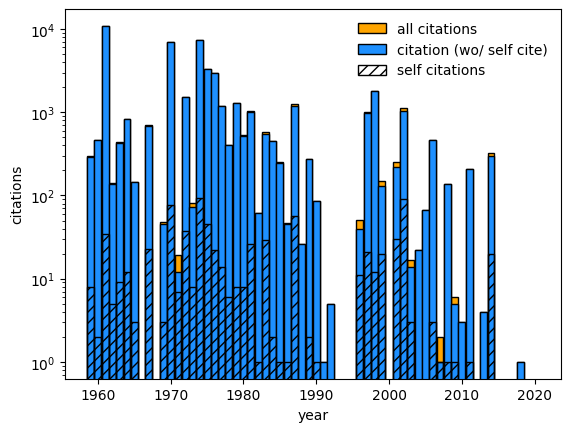

In [89]:
plot_kwargs = {'width': 0.95}
plt.bar(years, citations, fc='orange', ec='black', label=r'all citations', **plot_kwargs)
plt.bar(years, citations_noself, fc='dodgerblue', ec='black', label=r'citation (wo/ self cite)', **plot_kwargs)
plt.bar(years, self_citations, fc='None', ec='black', hatch='///', label=r'self citations', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'year')
plt.yscale('log')
plt.ylabel(r'citations')
plt.savefig('plots/Weinbergs_citations.pdf')

## Now some metrics on the number of authors 

In [90]:
nauthors = []
nauthors_wellcited = []
for record in authors[0].inspire_records.values():
    nauthors.append(record.author_count)
    if record.citation_count > 50:
        nauthors_wellcited.append(record.author_count)


Text(0, 0.5, 'papers')

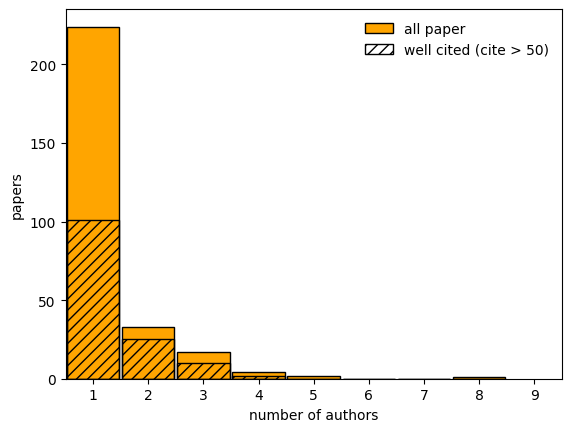

In [91]:
bins = list(range(1,10))
plot_kwargs = {'width': 0.95}
h = np.histogram(nauthors, bins = bins)
h_wc = np.histogram(nauthors_wellcited, bins = bins)
plt.bar(h[1][:-1], h[0], fc='orange', ec='black', label=r'all paper', **plot_kwargs)
plt.bar(h_wc[1][:-1], h_wc[0], fc='None', ec='black', hatch='///', label=r'well cited (cite > 50)', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'number of authors')
plt.xticks(bins)
plt.xlim(0.5,9.5)
plt.ylabel(r'papers')

## We can get a nice latex friendly list of your records

In [40]:
print(authors[0].nice_publication_list(latex_itemize=True, split_peer_review=True))

\textbf{Peer-reviewed publications}
\begin{enumerate}
\item On the Development of Effective Field Theory, Steven Weinberg, Eur.Phys.J.H 46 (2021) 1 6, arXiv:2101.04241 [hep-th], citations: \textbf{45}.
\item Massless particles in higher dimensions, Steven Weinberg, Phys.Rev.D 102 (2020) 9 095022, arXiv:2010.05823 [hep-th], citations: \textbf{17}.
\item Models of Lepton and Quark Masses, Steven Weinberg, Phys.Rev.D 101 (2020) 3 035020, arXiv:2001.06582 [hep-th], citations: \textbf{48}.
\item Absorption of Gravitational Waves from Distant Sources, Raphael Flauger, Steven Weinberg, Phys.Rev.D 99 (2019) 12 123030, arXiv:1906.04853 [hep-th], citations: \textbf{18}.
\item Soft Bremsstrahlung, Steven Weinberg, Phys.Rev.D 99 (2019) 7 076018, arXiv:1903.11168 [astro-ph.GA], citations: 8.
\item Essay: Half a Century of the Standard Model, Steven Weinberg, Phys.Rev.Lett. 121 (2018) 22 220001, citations: \textbf{32}.
\item Gravitational Waves in Cold Dark Matter, Raphael Flauger, Steven Weinberg, 

In [47]:
print(authors[0].get_coauthors_formatted(output_file='weinberg_coauthors.csv'))

"Author","Affiliation","Last Active"
"Bousso, Raphael","LBNL, Berkeley","2020"
"Quevedo, Fernando","Cambridge U., DAMTP","2020"
"Flauger, Raphael","UC, San Diego","2019"
"Lucas, Peter","Fermilab","2011"
"Childress, Sam","Fermilab","2011"
"Doe, John","Texas U., Arlington","2011"
"Aymar, Robert","CERN","2011"
"Chu, Steven","Stanford U.","2011"
"McMillan, Edwin","Texas U., Arlington","2011"
"Bush, George","Texas U., Arlington","2011"
"Jackson, Andrew","Texas U., Arlington","2011"
"Martel, Hugo","Texas U.","1997"
"Shapiro, Paul R.","Texas U.","1997"
"Gomis, Joaquim","Kyoto U., RIMS","1995"
"D'Hoker, Eric","UCLA","1994"
"Hall, Lawrence J.","UC, Berkeley","1993"
"Coleman, Sidney R.","UC, Santa Barbara","1991"
"Hartle, J.B.","UC, Santa Barbara","1991"
"Piran, T.","Unknown","1991"
"Gross, D.J.","Princeton U.","1991"
"Wheeler, J.C.","Texas U.","1990"
"Nelson, D.","Harvard U.","1989"
"Feynman, R.P.","Caltech","1987"
"Bahcall, J.N.","Princeton, Inst. Advanced Study","1987"
"Jackiw, R.","MIT, LNS"